In [75]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [214]:
def mse(y_hat, y):
    return np.sum((y_hat - y)**2)/len(y)
    

<b>Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без. </b>

In [96]:
#X = zp
X = np.array( [35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
X

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [97]:
#y = ks
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [98]:
n=len(X)
n

10

без использования intercept

In [99]:
X = X.reshape((n,1))
X

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [100]:
y = y.reshape((n,1))
y

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [101]:
b_hat_1 = np.dot(np.linalg.inv(np.dot(X.T, X)),X.T@y)
b_hat_1

array([[5.88982042]])

In [102]:
y_hat_1 = X@b_hat_1
y_hat_1

array([[ 206.1437147 ],
       [ 265.04191891],
       [1119.06587983],
       [1177.96408403],
       [ 235.59281681],
       [ 412.28742941],
       [ 318.05030269],
       [ 883.47306302],
       [ 706.77845042],
       [ 647.88024621]])

с использованием intercept

In [103]:
X2 = np.hstack([np.ones((n,1)), X])
X2

array([[  1.,  35.],
       [  1.,  45.],
       [  1., 190.],
       [  1., 200.],
       [  1.,  40.],
       [  1.,  70.],
       [  1.,  54.],
       [  1., 150.],
       [  1., 120.],
       [  1., 110.]])

In [104]:
b_hat_2 = np.dot(np.linalg.inv(np.dot(X2.T, X2)),X2.T@y)
b_hat_2

array([[444.17735732],
       [  2.62053888]])

In [105]:
y_hat_2=X2@b_hat_2
y_hat_2

array([[535.89621821],
       [562.10160703],
       [942.07974498],
       [968.2851338 ],
       [548.99891262],
       [627.61507909],
       [585.68645697],
       [837.25818968],
       [758.64202321],
       [732.43663439]])

In [115]:
mse(y_hat_2, y)

6470.414201176659

In [116]:
mse(y_hat_1, y)

56516.8584157194

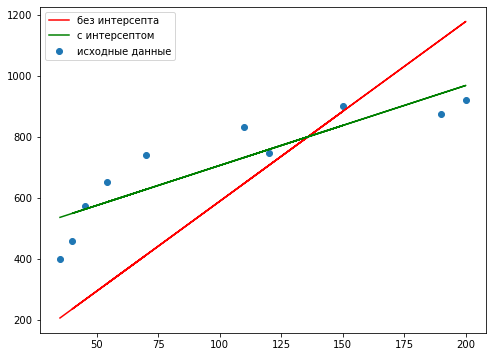

In [124]:
plt.figure(figsize=(8,6))
plt.scatter(X, y, label='исходные данные')
plt.plot(X, y_hat_1, color='r', label='без интерсепта')
plt.plot(X, y_hat_2, color='g', label='с интерсептом')
plt.legend()
plt.show()

<b>Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept). </b>

In [187]:
alfa = 1e-6
alfa

1e-06

In [195]:
B1 = 6

In [215]:
idx = np.arange(0, 500)
b = []
mse_data=[]

In [216]:
B1 = 6
for i in idx:
    
    B1 -= alfa*(2/n)*np.sum((B1*X-y)*X)
    b.append(B1)
    mse_data.append(mse((X*B1), y))
    if i%10 == 0:
        print('step: {} \t B = {} \t MSE = {}'.format(i, B1, mse((X*B1), y)))


step: 0 	 B = 5.9969642 	 MSE = 56675.010884630334
step: 10 	 B = 5.970846621494791 	 MSE = 56607.305174218185
step: 20 	 B = 5.951095515292692 	 MSE = 56568.58455176568
step: 30 	 B = 5.936158977583853 	 MSE = 56546.44038410262
step: 40 	 B = 5.924863399683319 	 MSE = 56533.776224013534
step: 50 	 B = 5.916321254067367 	 MSE = 56526.53364198457
step: 60 	 B = 5.909861358667003 	 MSE = 56522.391638560955
step: 70 	 B = 5.904976140074413 	 MSE = 56520.02284352452
step: 80 	 B = 5.901281751973945 	 MSE = 56518.66813920615
step: 90 	 B = 5.898487915182776 	 MSE = 56517.893389275516
step: 100 	 B = 5.896375109542594 	 MSE = 56517.45031291789
step: 110 	 B = 5.894777325560616 	 MSE = 56517.19691933769
step: 120 	 B = 5.893569020544524 	 MSE = 56517.05200457216
step: 130 	 B = 5.892655254335584 	 MSE = 56516.96912840275
step: 140 	 B = 5.891964229574883 	 MSE = 56516.92173185607
step: 150 	 B = 5.891441650368923 	 MSE = 56516.89462596234
step: 160 	 B = 5.891046456097987 	 MSE = 56516.879124

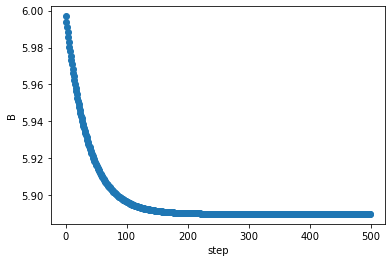

In [219]:
plt.scatter(idx,b)
plt.xlabel('step')
plt.ylabel('B')
plt.show()

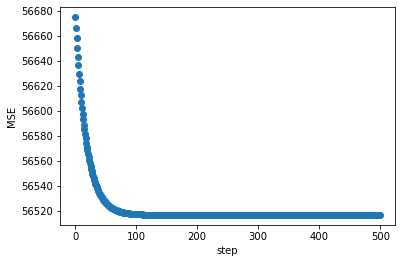

In [223]:
plt.scatter(idx,mse_data)
plt.xlabel('step')
plt.ylabel('MSE')
plt.show()

<b> Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации). </b>

$MSE = \frac{1}{N} \sum \limits_{i=0}^{N} (\hat{Y}-Y_{i})^{2} = \frac{1}{N} \sum \limits_{i=0}^{N} ((\beta_{0} + \beta_{1}X_{i})-Y_{i})^{2}$ 

$\frac{d MSE}{d\beta_{1}} = \frac{2}{N} \sum \limits_{i=0}^{N} ((\beta_{0} + \beta_{1}X_{i})-Y_{i})X_{i})$

$\frac{d MSE}{d\beta_{0}} = \frac{2}{N} \sum \limits_{i=0}^{N} ((\beta_{0} + \beta_{1}X_{i})-Y_{i})$


In [370]:
B1 = 500 #np.random.randint(1, 1000)
B0 = 500 #np.random.randint(1, 1000)
alfa = 1e-6
num_iteration = 1000

b1 = []
b0 = []
mse_2 = []

for i in range(num_iteration):
    B1 -= alfa*(2/n)*np.sum((B0+B1*X-y)*X)
    B0 -= alfa*(2/n)*np.sum((B0+B1*X-y))
    b1.append(B1)
    b0.append(B0)
    
    mse_2.append(mse((X*B1+B0), y))
    if i%500 == 0:
        print('step: {} \t B1 = {} \t B0 = {} \t MSE = {}'.format(i, B1, B0, mse((X*B1), y)))


step: 0 	 B1 = 486.2842834 	 B0 = 499.90180134732645 	 MSE = 3179404284.8526397
step: 500 	 B1 = 2.236395667985012 	 B0 = 496.4239068028349 	 MSE = 240400.198015654


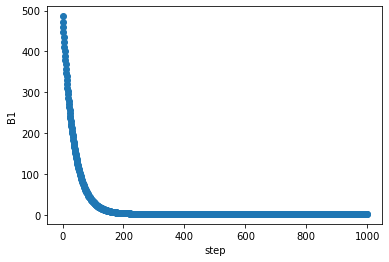

In [371]:
plt.scatter(np.arange(0,num_iteration), b1)
plt.xlabel('step')
plt.ylabel('B1')
plt.show()

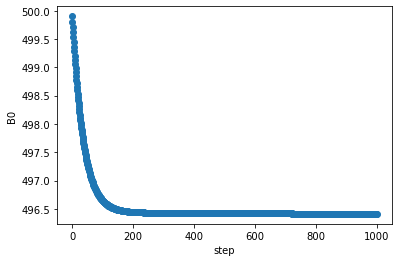

In [372]:
plt.scatter(np.arange(0,num_iteration), b0)
plt.xlabel('step')
plt.ylabel('B0')
plt.show()

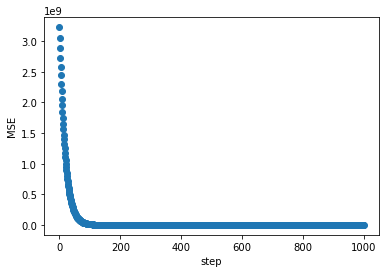

In [373]:
plt.scatter(np.arange(0,num_iteration),mse_2)
plt.xlabel('step')
plt.ylabel('MSE')
plt.show()

In [374]:
print(f'B1 = {min(b1)}')
print(f'B0 = {min(b0)}')
print(f'min MSE = {min(mse_2)}')

B1 = 2.236016693724747
B0 = 496.41067959424805
min MSE = 7162.493237969002


In [375]:
B1 = 900 #np.random.randint(1, 1000)
B0 = 449 #np.random.randint(1, 1000)
alfa = 1e-6
num_iteration = 1000

b1 = []
b0 = []
mse_2 = []

for i in range(num_iteration):
    B1 -= alfa*(2/n)*np.sum((B0+B1*X-y)*X)
    B0 -= alfa*(2/n)*np.sum((B0+B1*X-y))
    b1.append(B1)
    b0.append(B0)
    
    mse_2.append(mse((X*B1+B0), y))
    if i%500 == 0:
        print('step: {} \t B1 = {} \t B0 = {} \t MSE = {}'.format(i, B1, B0, mse((X*B1), y)))


step: 0 	 B1 = 875.2733462 	 B0 = 448.82301636539063 	 MSE = 10412792613.914394
step: 500 	 B1 = 2.6330626726603503 	 B0 = 442.5773786813139 	 MSE = 202637.96714866866


In [376]:
print(f'B1 = {min(b1)}')
print(f'B0 = {min(b0)}')
print(f'min MSE = {min(mse_2)}')

B1 = 2.632312491830764
B0 = 442.5773532256273
min MSE = 6471.063241667372


<b>выводы:</b>
- результат очень сильно зависит от начальных значений B0 и B1. могу это обяснить лишь тем, из того что я читал, что находит первый минимум и не может из него выбраться. хотя дальше может быть еще меньшее значение.
- непонятно как задавать эти начальные значения, если даже примерный порядок не знаешь, возможно итерации какие-то, типа ткунл пальцем в небо, он посчитал. затем задаешь значение еще меньше, смотришь на MSE и т.д.
- таким способом получилось получить отдаленно похожие результаты 
